In [2]:
import numpy as np  # for numerical operations
import pandas as pd  # for data manipulation
import matplotlib.pyplot as plt  # for plotting graphs


In [3]:
df = pd.read_csv('laptop_data.csv')  # load the dataset
df.head()  #lets have a look on the first 5 rows

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.shape  # returns the number of rows and columns in the dataset

(1303, 12)

In [5]:
#we don't have too much data to train our model 

In [6]:
# Displaying basic information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [7]:
# This method provides a concise summary of the DataFrame:
# - Total number of entries: 1303 rows (from index 0 to 1302)
# - Total number of columns: 12
# - Each column’s name, non-null count, and data type are shown
# - All columns have 1303 non-null entries, meaning there are no missing values
# - Data types summary:
#   - 1 column is of type int64 (`Unnamed: 0`, likely an index)
#   - 2 columns are of type float64 (`Inches`, `Price`)
#   - 9 columns are of type object (likely strings or mixed types)
# - This information helps identify which columns may need type conversion or further processing (e.g., parsing RAM or GPU)
# - Also useful for checking for missing values 

In [8]:
# Checking for duplicate rows in the DataFrame
df.duplicated().sum()

np.int64(0)

In [9]:
# Checking for missing (null) values in each column
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [10]:
# Dropping the 'Unnamed: 0' column from the DataFrame
df.drop(columns=['Unnamed: 0'], inplace=True)

# Explanation:
# - 'Unnamed: 0' is likely an unnecessary index column added during CSV import (e.g., from `index=False` not being set when saving).

In [11]:
# Let confirm that the 'Unnamed: 0' column has been successfully removed.
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [12]:
# Cleaning 'Ram' and 'Weight' columns by removing unit strings
df['Ram'] = df['Ram'].str.replace('GB', '')
df['Weight'] = df['Weight'].str.replace('kg', '')

# Explanation:
# - The 'Ram' column values are strings like '8GB', '16GB', etc. — we remove the 'GB' to retain just the numeric part.
# - Similarly, 'Weight' values include 'kg' — we remove it for numeric conversion.
# - These steps prepare the columns for type conversion (e.g., to integers or floats) so they can be used in analysis or modeling.

In [13]:
# Verifying the results after cleaning 'Ram' and 'Weight' columns
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [14]:
# Converting 'Ram' and 'Weight' columns to appropriate numeric data types
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [15]:
# Rechecking DataFrame structure after data type conversions
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


In [16]:
# Importing Seaborn for advanced data visualization
import seaborn as sns

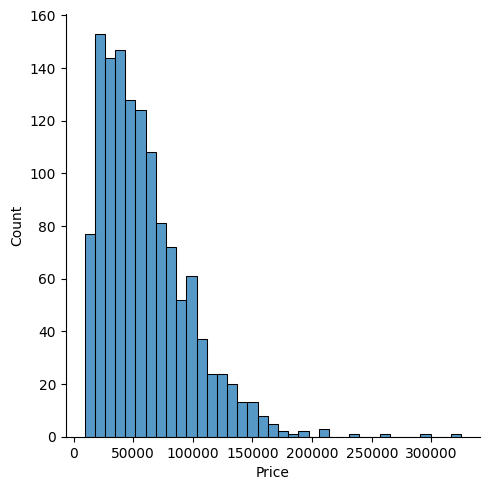

In [17]:
# Plotting the distribution of laptop prices
sns.displot(df['Price'])

In [18]:
# Most of the laptops are priced under ₹100,000, and the distribution is clearly right-skewed.
# There are a few laptops with really high prices, which could be considered outliers.
# This gives me an idea that I might need to apply a log transformation later to normalize the prices.

<Axes: xlabel='Company'>

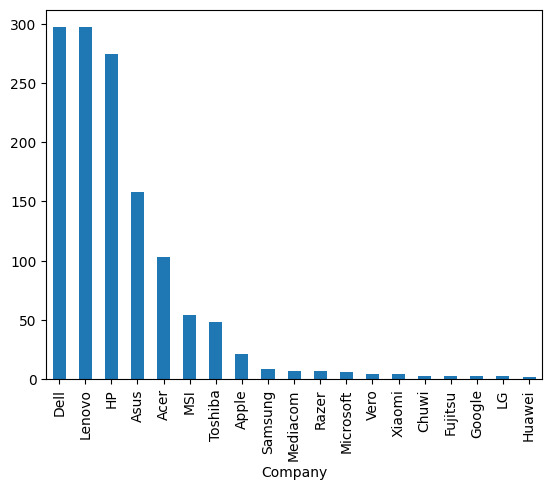

In [19]:
# Plotting the distribution of laptop brands (Companies)
df['Company'].value_counts().plot(kind='bar')

In [20]:
# As we can see, Dell and Lenovo dominate the dataset, with Dell having the most laptops listed.
# Other brands like HP, Asus, and Acer also have a decent share, but the rest of the companies have much fewer laptops.
# This might give us an idea about brand popularity in the dataset, and could affect brand-related analysis.

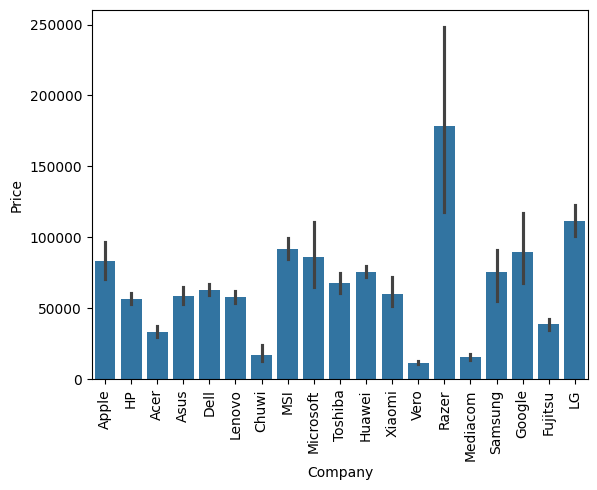

In [21]:
# Plotting average laptop price for each company
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation ='vertical')
plt.show()

In [22]:
# This helps me compare how different brands are priced on average.
# Apple, Microsoft, and Razer stand out with much higher average prices,
# while brands like Acer, Chuwi, and Mediacom are clearly on the budget side.
# The error bars show some brands have a big range in prices — probably due to entry-level vs high-end models.

<Axes: xlabel='TypeName'>

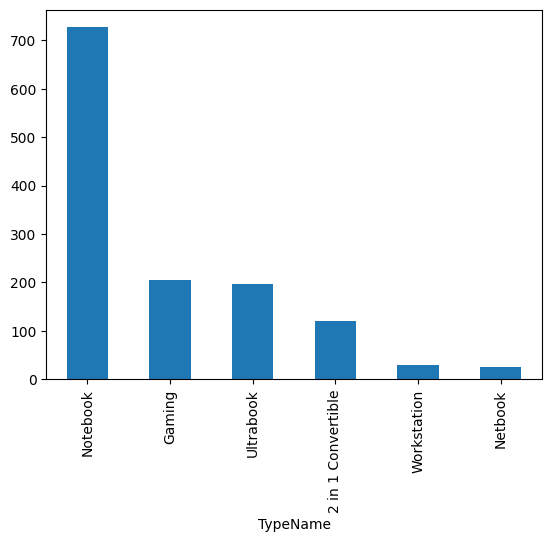

In [23]:
# Checking how many laptops fall into each type category
df['TypeName'].value_counts().plot(kind='bar')

In [24]:
# Notebooks are by far the most common type in this dataset.
# Gaming and Ultrabook models come next, while 2 in 1 Convertibles are less common.
# Workstations and Netbooks are rare — probably more niche or older models.
# This helps get a feel for what kind of laptops are mostly represented in the data.

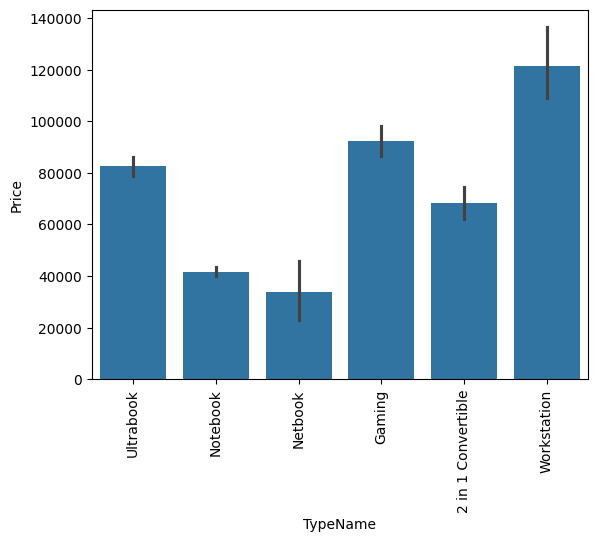

In [25]:
# Checking average laptop price by type
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation ='vertical')
plt.show()

In [26]:
# This makes it really clear that Workstations are the most expensive on average.
# Gaming and Ultrabooks also have high average prices, which makes sense based on their performance focus.
# Notebooks and Netbooks are on the cheaper side — probably aimed at casual or budget users.
# This gives a good idea of how pricing varies depending on the laptop's purpose.

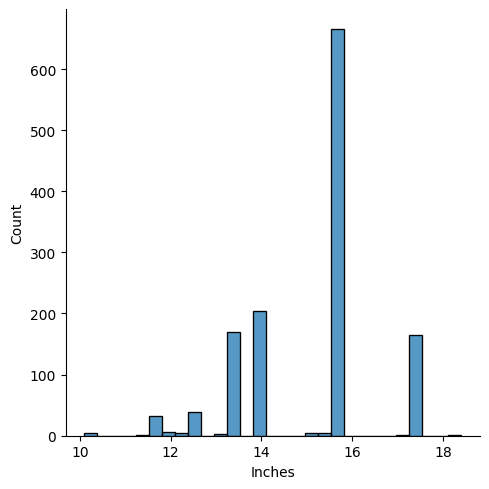

In [27]:
# Checking the distribution of laptop screen sizes (in inches)
sns.displot(df['Inches'])

In [28]:
# Looks like 15.6 inches is by far the most common screen size — probably the standard for most laptops.
# There's a decent number of 13-14 inch laptops too, which are usually more portable.
# Very few laptops have screens smaller than 12 or larger than 17 inches.
# This gives a good idea of what screen sizes are most popular in the dataset.

<Axes: xlabel='Inches', ylabel='Price'>

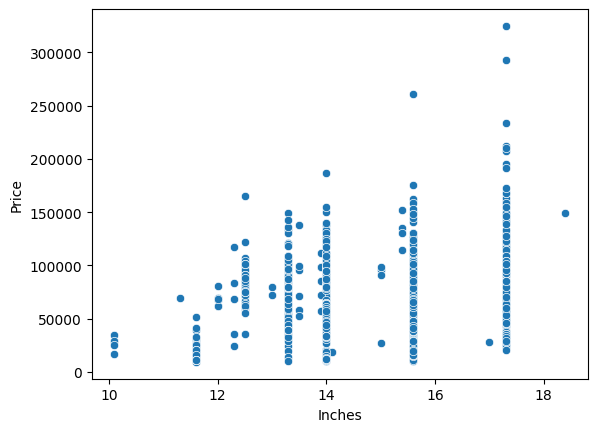

In [29]:
# Plotting laptop price against screen size
sns.scatterplot(x=df['Inches'],y= df['Price'])

In [30]:
# This plot shows that, in general, laptops with larger screens tend to cost more.
# But it’s not a strict rule — there are small laptops that are expensive too (probably high-end ultrabooks).
# There's quite a bit of variation at each screen size, especially around 15.6 inches.
# So screen size alone doesn’t determine price, but it definitely plays a role.

In [31]:
# Looking at the different screen resolution formats in the dataset
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

In [32]:
# There’s a huge variety here — many entries include extra info like "IPS Panel", "Touchscreen", or "Retina Display" along with the actual resolution.
# The most common resolution is Full HD (1920x1080), followed by 1366x768.
# Some entries also combine features (like "IPS Panel Full HD / Touchscreen"), which could be split into separate columns later.
# I might need to extract just the resolution (e.g., width x height) and maybe create new features like:
# - whether the screen is a touchscreen
# - whether it's an IPS panel
# - and the actual resolution as numeric values

In [33]:
# Creating a new column to indicate if the laptop has a touchscreen
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [34]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


<Axes: xlabel='Touchscreen'>

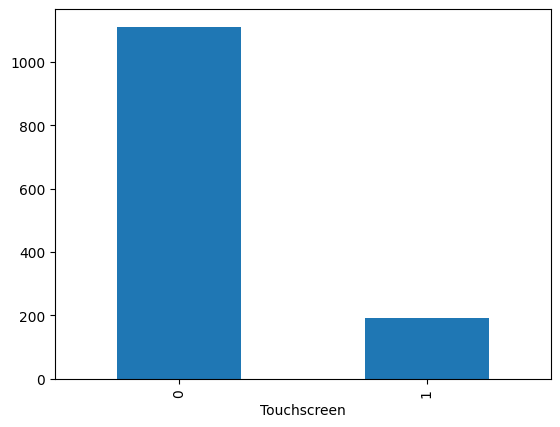

In [35]:
# Checking how many laptops have a touchscreen
df['Touchscreen'].value_counts().plot(kind='bar')

In [36]:
# Most of the laptops in the dataset don’t have a touchscreen.
# Only a small portion (around 200 or so) come with one.
# This confirms that touchscreens are less common overall, which makes sense for traditional laptops.

<Axes: xlabel='Touchscreen', ylabel='Price'>

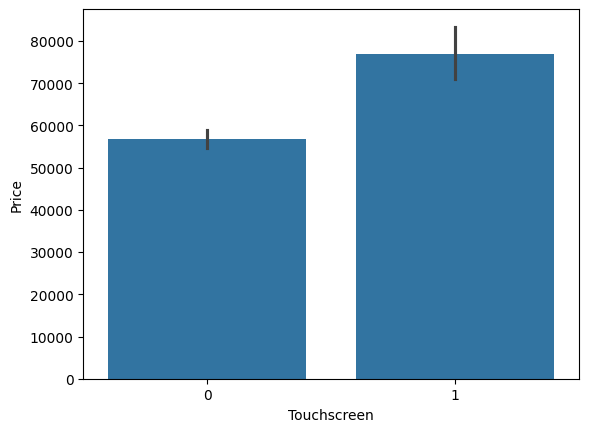

In [37]:
# Comparing average price of Touchscreen vs Non-Touchscreen laptops
sns.barplot(x=df['Touchscreen'],y=df['Price'])

-Touchscreen laptops are significantly more expensive on average.

In [38]:
# Create a new column 'Ips' where 1 indicates the screen has IPS technology, and 0 otherwise
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

<Axes: xlabel='Ips'>

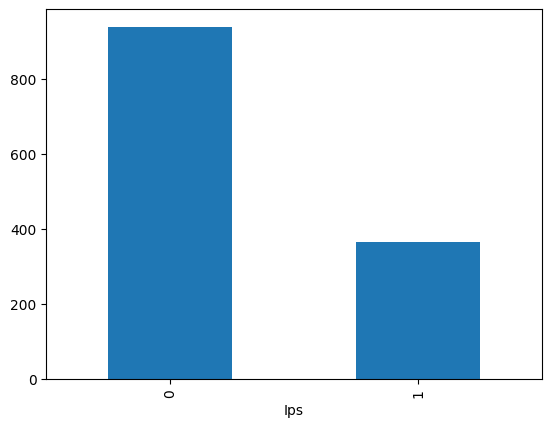

In [39]:
# Plot the number of laptops with and without IPS displays
df['Ips'].value_counts().plot(kind='bar')

- Most laptops in the dataset (around 900) don't have IPS panels,
- while around 400 do. So IPS screens are less common overall.
- This could suggest that IPS is more of a premium feature.

<Axes: xlabel='Ips', ylabel='Price'>

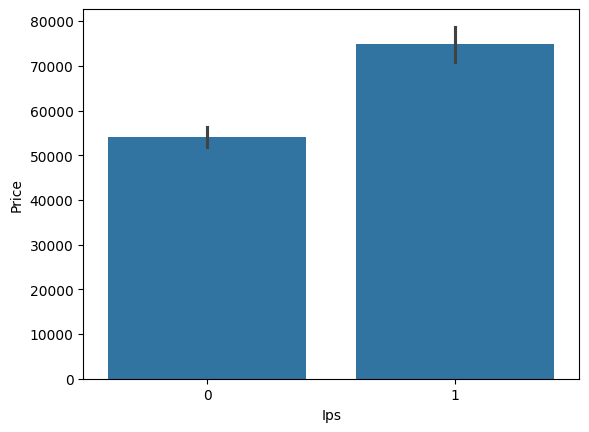

In [40]:
# Comparing average prices of laptops with and without IPS displays
sns.barplot(x=df['Ips'],y=df['Price'])

- Laptops without IPS panels have an average price around ₹55,000,
- while IPS ones average closer to ₹75,000.
- That’s a big jump — clearly, IPS screens are associated with more premium models.

In [41]:
# Splitting the 'ScreenResolution' column to separate width and height values
new= df['ScreenResolution'].str.split('x',n=1,expand=True)

In [42]:
# Assigning the separated resolution values to new columns
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [43]:
# Cleaning up 'X_res' to extract only the numeric resolution width
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x: x[0])

In [44]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [45]:
# Checking the DataFrame structure after extracting resolution width and height
# Also checking their data types — they'll probably still be 'object' (strings) for now.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   object 
 14  Y_res             1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(9)
memory usage: 142.6+ KB


In [46]:
# Converting resolution columns to integers
# I’ll need to convert them to integers before doing any calculations like PPI.
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [47]:
# Verifying the data types after converting resolution columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 142.6+ KB


In [48]:
# Checking correlation of all numerical columns with Price
df.select_dtypes(include='number').corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

* **RAM** has the **strongest correlation with price** (`0.74`). Laptops with more RAM are generally much more expensive.

* **Screen resolution** (`X_res`, `Y_res`) also shows a **moderate positive correlation** with price (around `0.55` each). Higher resolution = higher price.

* **PPI (Pixels Per Inch)**, calculated from resolution and screen size, has a decent correlation with price (`0.47`), highlighting that **display sharpness** matters.

* **IPS display** (`0.25`) and **Touchscreen** (`0.19`) also increase the average price, indicating these are considered premium features.

* **Weight** has a weak positive correlation (`0.21`) — likely because lightweight laptops (like ultrabooks) can be expensive, but not always.

* Surprisingly, **screen size (`Inches`)** has almost **no correlation** with price (`0.06`). This suggests **size alone doesn’t determine cost** — display quality and internal specs matter more.

In [49]:
# Calculating PPI (Pixels Per Inch) for each laptop display
df['ppi'] = ((((df['X_res']**2) + (df['Y_res']**2))**0.5)/df['Inches']).astype('float')

In [50]:
# Checking updated correlations of all numeric features with Price (after adding PPI)
df.corr(numeric_only=True).get('Price')

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

- After adding PPI, we can see it's moderately correlated with price (0.47),
- meaning sharper screens usually cost more — but not as much as RAM or resolution.
- RAM still has the strongest correlation with price.
- Features like IPS panel and Touchscreen also contribute to higher prices,
- while screen size (Inches) surprisingly has very little impact.

In [51]:
# Dropping columns related to screen resolution and size 
# since we've already extracted useful features like PPI, IPS, and Touchscreen from them.
df.drop(columns=['ScreenResolution','Inches','X_res','Y_res'], inplace=True)

In [52]:
# Taking a quick look at the updated dataframe after dropping unnecessary columns
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [53]:
# Checking how many different CPU types we have and how often each one appears
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core i5 7200U 2.70GHz        1
Intel Core M M7-6Y75 1.2GHz        1
Intel Core M 6Y54 1.1GHz           1
AMD E-Series 9000 2.2GHz           1
Samsung Cortex A72&A53 2.0GHz      1
Name: count, Length: 118, dtype: int64

In [54]:
# Extracting the main CPU name (like 'Intel Core i5') from the full CPU description
df['Cpu_name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [55]:
# Checking the dataframe again to see the newly added 'Cpu_name' column
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [56]:
# Categorizing CPUs into main groups: i3, i5, i7, other Intel processors, and AMD processors
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5'  or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] =='Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [57]:
# Applying the fetch_processor function to create a new column with simplified CPU brand categories
df['Cpu_brand'] = df['Cpu_name'].apply(fetch_processor)

In [58]:
# Previewing the dataframe again to confirm the new 'Cpu_brand' column was added correctly
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_name,Cpu_brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu_brand'>

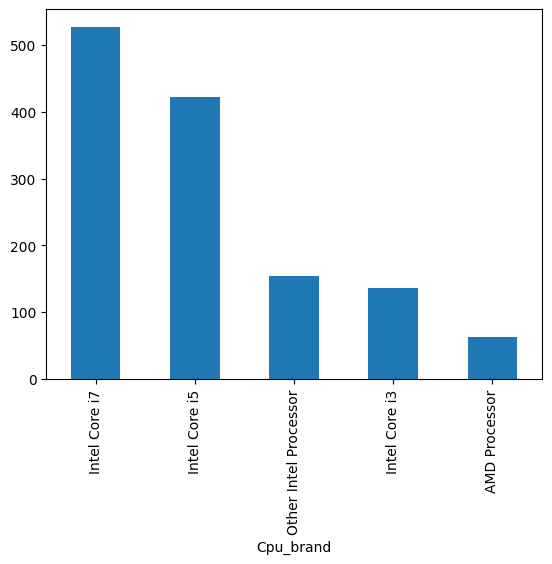

In [59]:
# Plotting the count of laptops for each CPU brand category to see their distribution
df['Cpu_brand'].value_counts().plot(kind='bar')


This bar chart shows how many laptops there are for each CPU type.

* **Intel Core i7** has the most number of laptops, followed by **Intel Core i5**.
* Then comes **Other Intel Processors** and **Intel Core i3**.
* **AMD Processors** are the least used among all.

So yeah, Intel is clearly dominating here, especially with i5 and i7 CPUs.

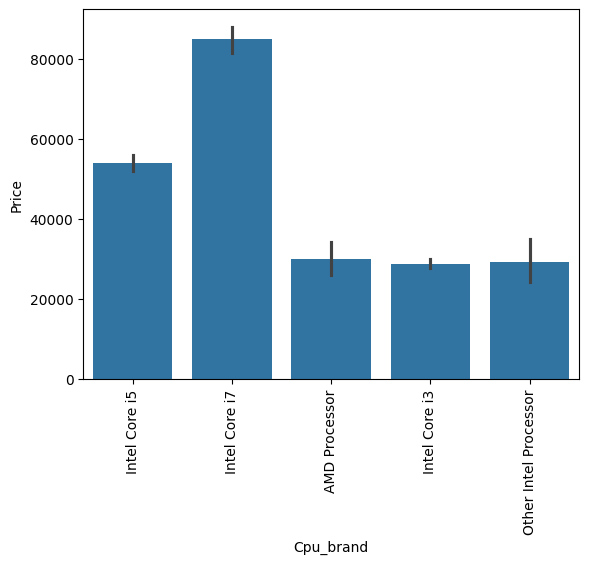

In [60]:
# Visualizing how laptop prices vary across different CPU brands
sns.barplot(x=df['Cpu_brand'], y=df['Price'])
plt.xticks(rotation='vertical')  # Rotating labels for better readability
plt.show()

This chart shows the average price of laptops for each CPU type.

* **Intel Core i7** laptops are the most expensive.
* Then comes **Intel Core i5**, a bit cheaper but still on the higher side.
* **Intel Core i3**, **Other Intel**, and **AMD** are all in the lower price range.
* **AMD laptops** seem to be the cheapest overall.

Basically, the better the CPU, the higher the price – makes sense.

In [61]:
# Removing 'Cpu' and 'Cpu_name' columns since we've already extracted the relevant info in 'Cpu_brand'
df.drop(columns=['Cpu','Cpu_name'],inplace= True)

In [62]:
# Checking the first few rows to confirm the changes after dropping columns
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<Axes: xlabel='Ram'>

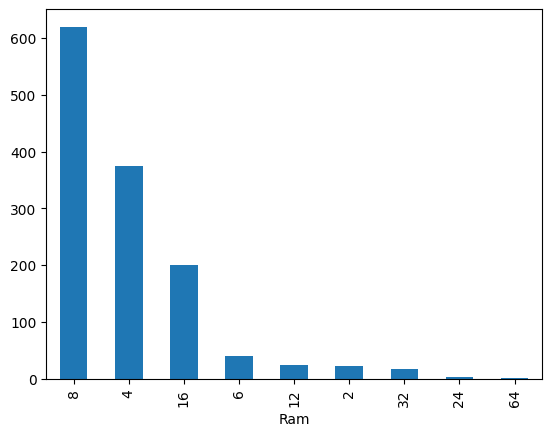

In [63]:
# Visualizing how many laptops come with different RAM sizes
df['Ram'].value_counts().plot(kind='bar')

- most laptops in dataset come with 8GB ram.
- after that 4GB and 16GB are common.
- very few laptops have 24GB, 32GB or 64GB ram.

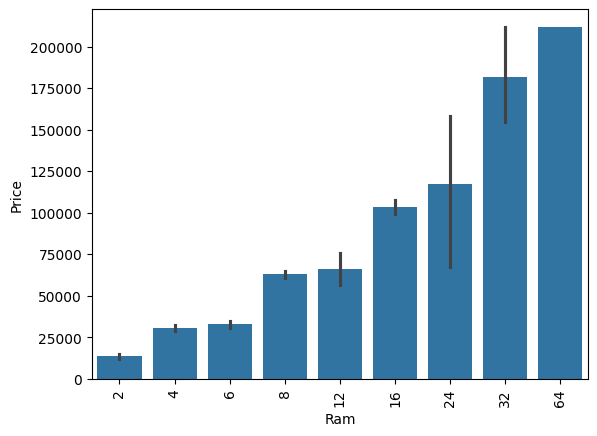

In [64]:
# Checking how laptop prices vary depending on the RAM size
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

- price increases with ram size.
- laptops with 2GB or 4GB ram are the cheapest.
- 64GB ram laptops are the most expensive, as expected.
- overall, more ram → more price.

In [65]:
# checking how many laptops have each type of memory configuration
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
64GB SSD                       

 * most common is **256GB SSD**, followed by **1TB HDD**.
 * **500GB HDD** and **512GB SSD** are also popular choices.
 * hybrid setups like **128GB SSD + 1TB HDD** and **256GB SSD + 1TB HDD** are fairly frequent too.
 * flash storage (e.g., 32GB or 64GB) appears in budget models, but not very common.
 * high-end configurations like **1TB SSD**, **512GB SSD + 1TB HDD**, and **2TB HDD** exist but are rare.
 * a few strange or rare combinations (like **508GB Hybrid**, **8GB SSD**, or dual SSDs) appear only once.

In [66]:
# Clean the 'Memory' column to standardize the format
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)  # Remove decimal .0
df['Memory'] = df['Memory'].str.replace('GB', '')  # Remove 'GB'
df['Memory'] = df['Memory'].str.replace('TB', '000')  # Replace 'TB' with '000' to convert TB to GB

# Split into two memory parts (for entries like '128 SSD + 1TB HDD')
new = df['Memory'].str.split('+', n=1, expand=True)

# Get the first part and remove whitespace
df['first'] = new[0].str.strip()
df['second'] = new[1].fillna('0')  # Fill missing second part with '0'

# Create binary columns for memory types in the first layer
df['Layer1HDD'] = df['first'].apply(lambda x: 1 if 'HDD' in x else 0)
df['Layer1SSD'] = df['first'].apply(lambda x: 1 if 'SSD' in x else 0)
df['Layer1Hybrid'] = df['first'].apply(lambda x: 1 if 'Hybrid' in x else 0)
df['Layer1Flash_Storage'] = df['first'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

# Do the same for the second layer
df['Layer2HDD'] = df['second'].apply(lambda x: 1 if 'HDD' in x else 0)
df['Layer2SSD'] = df['second'].apply(lambda x: 1 if 'SSD' in x else 0)
df['Layer2Hybrid'] = df['second'].apply(lambda x: 1 if 'Hybrid' in x else 0)
df['Layer2Flash_Storage'] = df['second'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

# Extract only numbers (e.g. '128 SSD' -> '128'), replacing empty strings with 0
df['first'] = df['first'].str.extract('(\d+)')  # Extract numeric part
df['second'] = df['second'].str.extract('(\d+)')  # Extract numeric part

# Replace NaNs (if any) with 0 before converting to int
df['first'] = df['first'].fillna(0).astype(int)
df['second'] = df['second'].fillna(0).astype(int)

# Calculate total amount of each storage type
df['HDD'] = df['first'] * df['Layer1HDD'] + df['second'] * df['Layer2HDD']
df['SSD'] = df['first'] * df['Layer1SSD'] + df['second'] * df['Layer2SSD']
df['Hybrid'] = df['first'] * df['Layer1Hybrid'] + df['second'] * df['Layer2Hybrid']
df['Flash_Storage'] = df['first'] * df['Layer1Flash_Storage'] + df['second'] * df['Layer2Flash_Storage']

# Drop temporary processing columns
df.drop(columns=[
    'first', 'second',
    'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1Flash_Storage',
    'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid', 'Layer2Flash_Storage'
], inplace=True)

In [67]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [68]:
# dropping the original Memory column since we’ll break it down into separate features
df.drop(columns=['Memory'],inplace=True)

In [69]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [70]:
# Checking the correlation of all numerical columns with Price to see which features really affect it
df.corr(numeric_only=True).get('Price')

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

* **Ram → 0.74** → More RAM means significantly higher prices. It's a strong positive relation.
* **SSD → 0.67** → Laptops with SSD storage are much more expensive. Big impact.
* **ppi → 0.47** → Sharper displays (higher pixels per inch) generally cost more.
* **Ips → 0.25** → IPS panels slightly increase price — better viewing experience = higher cost.
* **Weight → 0.21** → Slight positive relation — possibly lighter or premium builds cost more.
* **Touchscreen → 0.19** → Touchscreens increase the price, but not by a huge margin.
* **Hybrid → \~0.01** → Almost no effect — hybrid drives don’t influence price much.
* **Flash\_Storage → -0.04** → Slight negative correlation — likely seen in cheaper, compact devices.
* **HDD → -0.09** → Laptops with traditional HDDs tend to be cheaper.

In [71]:
# Dropping Hybrid and Flash_Storage columns as they don't have much impact on Price and just add noise
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [72]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [73]:
# Checking how many laptops come with which type of GPU (Graphics card)
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia Quadro M500M          1
AMD Radeon R7 M360           1
Nvidia Quadro M3000M         1
Nvidia GeForce 960M          1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

* The dataset contains **110 unique GPU entries**, showing a diverse range of graphics processors.
* **Intel GPUs** dominate the dataset, especially:
  * **Intel HD Graphics 620** (281 entries)
  * **Intel HD Graphics 520** (185 entries)
  * **Intel UHD Graphics 620** (68 entries)

* **Nvidia GPUs** are the most common dedicated GPUs:
  * **GTX 1050** (66 entries)
  * **GTX 1060** (48 entries)
* **Rare GPUs** like Nvidia Quadro, AMD Radeon, and ARM Mali appear only once each, indicating their use in specialized or high-end systems.
* The high number of Intel entries suggests a majority of **entry-level or productivity laptops**, while Nvidia entries point to **gaming or performance-focused models**.

In [74]:
# Extracting the GPU brand (first word) from the 'Gpu' column and storing it in a new column 'Gpu_brand'
df['Gpu_brand'] = df['Gpu'].apply(lambda x : x.split()[0])

In [75]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_brand,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [76]:
# count the number of laptops for each GPU brand
df['Gpu_brand'].value_counts()

Gpu_brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [77]:
# Removing rows where GPU brand is 'ARM' since ARM GPUs are rare in laptops and may act as outliers.
df = df[df['Gpu_brand'] != 'ARM']

In [78]:
# Checking the count of each GPU brand after removing 'ARM' 
df['Gpu_brand'].value_counts()

Gpu_brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

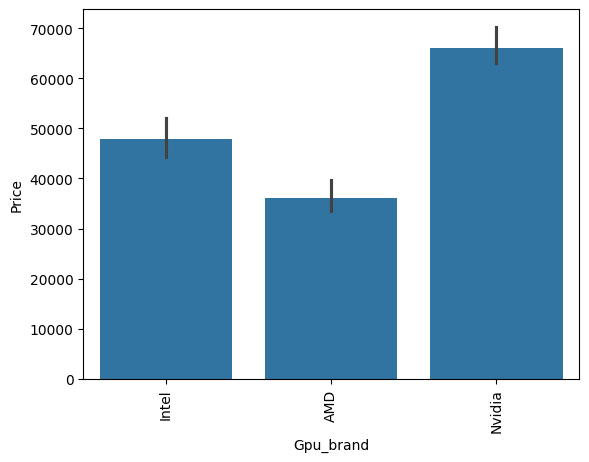

In [79]:
sns.barplot(x=df['Gpu_brand'],y=df['Price'],estimator= np.median)
plt.xticks(rotation='vertical')
plt.show()

* Laptops with **Nvidia graphics** are the most expensive on average, showing that they are usually found in gaming or high-performance machines.
* **Intel graphics** come in the middle range, mostly used in everyday laptops.
* **AMD graphics** are linked to the cheapest laptops, making them more common in budget options.

This shows a clear trend: the type of GPU brand has a strong effect on laptop pricing.

In [80]:
df.drop(columns=['Gpu'],inplace=True)

In [81]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_brand,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [82]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

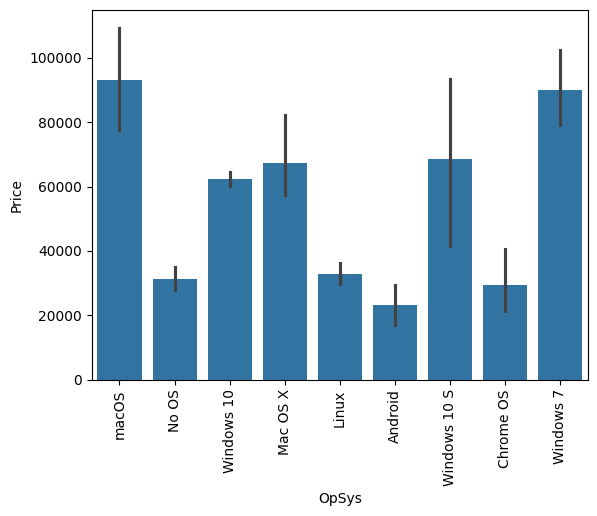

In [83]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

* **macOS laptops** are the most expensive, with **Mac OS and Windows 7** also showing high average prices.
* **Windows 10 and Windows 10 S** devices fall in the mid-price range, offering balance between affordability and performance.
* **Linux, Chrome OS, Android, and No OS** laptops are generally the cheapest, mostly seen in budget-friendly or lightweight machines.

👉 Overall, the **choice of operating system clearly influences laptop pricing**, with macOS leading the premium range while Linux/Chrome OS/Android cater to low-cost markets.

In [84]:
# Function to categorize operating systems into broader groups
def cat_os(inp):
    # Group all Windows versions under 'Windows'
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    # Group macOS variants under 'Mac'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    # All other OS (Linux, Chrome OS, Android, No OS, etc.) are grouped together
    else:
        return 'Other/No OS/Linux'

In [85]:
# Apply the cat_os function on the 'OpSys' column
# and create a new column 'os' with simplified OS categories
df['os'] = df['OpSys'].apply(cat_os)

In [86]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_brand,HDD,SSD,Gpu_brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Other/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [87]:
# Dropping the original 'OpSys' column since we have created 
# a simplified version 'os' for analysis
df.drop(columns=['OpSys'],inplace=True)

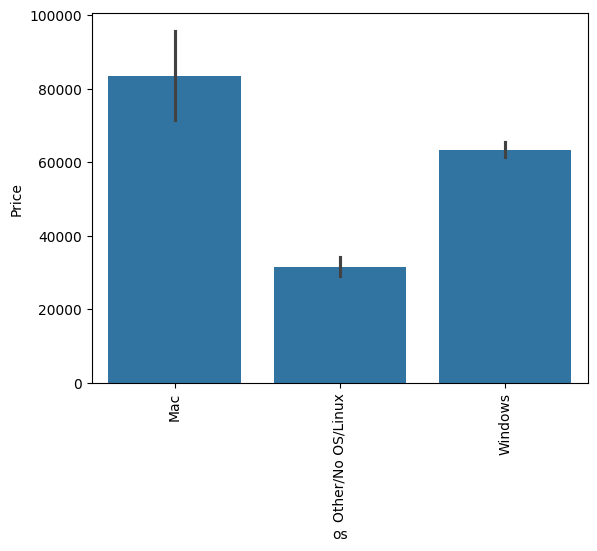

In [88]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

Laptops running **Mac OS** are priced the highest on average, clearly above both Windows and other operating systems. **Windows laptops** fall in the mid-range, while devices with **Linux/Other/No OS** are the cheapest. This shows how operating systems also contribute to overall pricing, with MacBooks targeting the premium market.


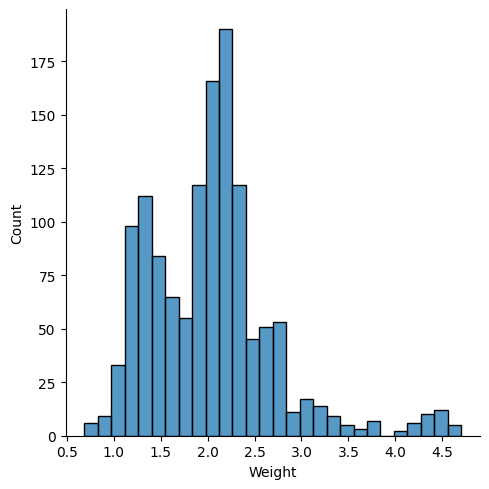

In [89]:
sns.displot(df['Weight'])

Most laptops weigh between 1.5 kg and 2.5 kg, making this the standard range for portable machines. 
A smaller number of laptops are very light (below 1.2 kg, typically ultrabooks) or heavy (above 3 kg, often gaming or workstation laptops). 
The distribution is slightly skewed to the right, showing that lightweight laptops are more common than very heavy ones.

<Axes: xlabel='Weight', ylabel='Price'>

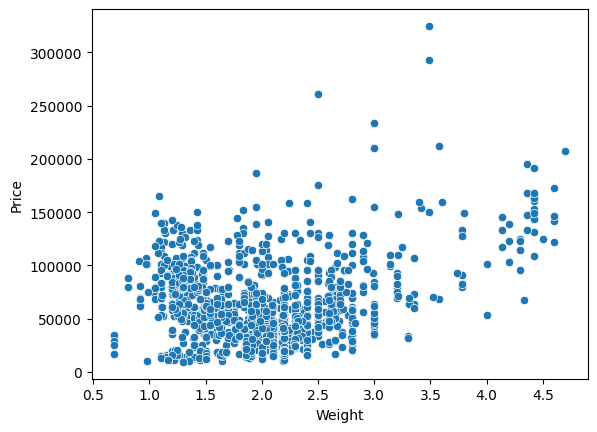

In [90]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

-  Most laptops weigh between **1.0 – 2.5 kg**.
- Prices in this weight range vary widely (from budget to premium).
- **Lightweight laptops (\~1–1.5 kg)** often include ultrabooks, which can be expensive despite being small.
- **Heavier laptops (>3 kg)** are less common but usually **high-priced**, likely gaming or workstation models.
- There’s **no strict linear correlation**, but extremes in weight (very light or very heavy) often mean **higher prices**.

In [91]:
df.corr(numeric_only=True)['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
Ips            0.253320
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

<Axes: >

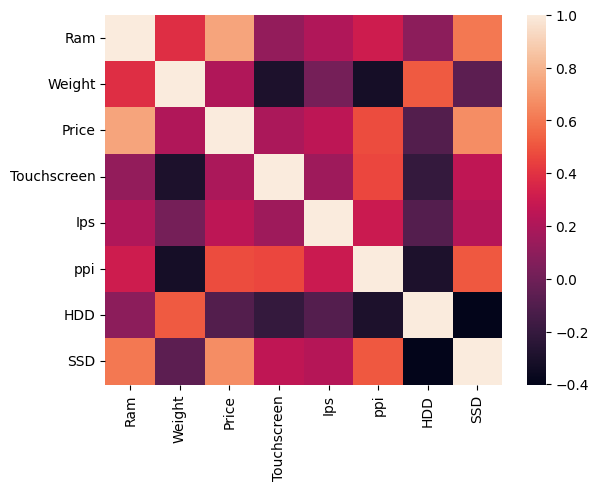

In [92]:
sns.heatmap(df.corr(numeric_only=True))

- **RAM vs Price → Strong positive correlation**
   → More RAM generally increases laptop price.

- **SSD vs Price → Positive correlation**
   → Laptops with SSDs are usually more expensive.

- **HDD vs SSD → Strong negative correlation**
   → Makes sense, laptops typically come with either HDD or SSD, not both in large amounts.

- **ppi (pixels per inch) vs Price → Positive correlation**
   → Higher screen resolution leads to higher prices.

- **Weight vs Price → Weak correlation**
   → Weight alone doesn’t determine price strongly.

- **Touchscreen & Ips (display tech) → Mild positive correlation with Price**
   → Premium features like touchscreen and IPS slightly raise laptop price.

- **HDD vs Price → Weak negative correlation**
   → Laptops with HDDs tend to be cheaper compared to SSD-based ones.

👉 The **strongest price drivers** here: **RAM, SSD, ppi (display quality)**.

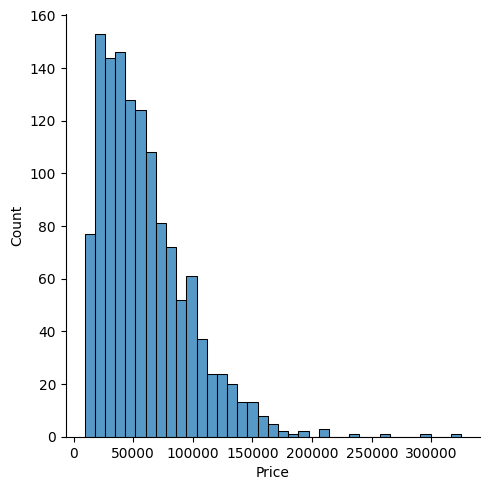

In [93]:
sns.displot(df['Price'])

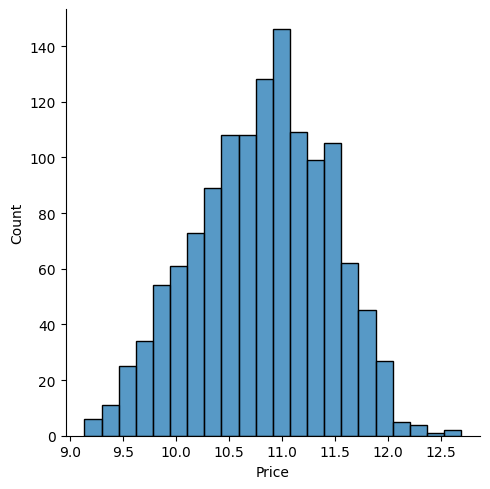

In [94]:
sns.displot(np.log(df['Price']))

- The original price distribution is **right-skewed**, with most laptops priced between **₹30,000–₹70,000**, while a few premium models go above ₹2,00,000.
- After applying a **log transformation**, the price distribution becomes much closer to **normal**, making it suitable for regression modeling.
- This transformation helps **reduce the impact of extreme outliers** and stabilizes variance, which improves model performance. 

In [95]:
# Define feature matrix (X) by dropping the target variable 'Price'
X = df.drop(columns=['Price'])

# Define target variable (y) as the log-transformed 'Price'
# Using log helps normalize the distribution and handle skewness in price values
y = np.log(df['Price'])

In [96]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu_brand,HDD,SSD,Gpu_brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Other/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [97]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [98]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [99]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu_brand,HDD,SSD,Gpu_brand,os
91,Acer,Notebook,8,2.20,0,0,141.211998,Intel Core i7,1000,0,Nvidia,Windows
863,Lenovo,Gaming,8,2.50,0,1,141.211998,Intel Core i5,1000,0,Nvidia,Other/No OS/Linux
552,Dell,Gaming,16,4.42,0,1,127.335675,Intel Core i7,1000,256,Nvidia,Windows
967,HP,Notebook,4,2.04,0,0,141.211998,Intel Core i3,500,0,Intel,Windows
365,HP,Notebook,8,2.04,0,0,100.454670,Other Intel Processor,2000,0,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Other/No OS/Linux


In [100]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [101]:
from sklearn.linear_model import  LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor , AdaBoostRegressor ,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

Linear Regression

In [102]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False, drop='first'),[0,1,7,10,11])
],remainder = 'passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8002405966123097
MAE 0.2045399581561919


Ridge Regression

In [103]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False, drop='first'),[0,1,7,10,11])
],remainder = 'passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8025355126649508
MAE 0.20379724333815175


Lasso Regression

In [104]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False, drop='first'),[0,1,7,10,11])
],remainder = 'passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7980036909700868
MAE 0.2060403823639508


KNN

In [105]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False, drop='first'),[0,1,7,10,11])
],remainder = 'passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7887457126932833
MAE 0.1965095677955422


Decision Tree

In [106]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False, drop='first'),[0,1,7,10,11])
],remainder = 'passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8144312896879373
MAE 0.19446234104773558


SVM

In [107]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False, drop='first'),[0,1,7,10,11])
],remainder = 'passthrough')

step2 = SVR(kernel='rbf' ,C=1000 ,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7562236835916191
MAE 0.22655466581081396


Random Forest

In [108]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False, drop='first'),[0,1,7,10,11])
],remainder = 'passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8618952788875983
MAE 0.16682948232961559


ExtraTrees

In [109]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False, drop='first'),[0,1,7,10,11])
],remainder = 'passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15,
                              bootstrap=True)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8701602779953299
MAE 0.16358584891218175


AdaBoost

In [110]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False, drop='first'),[0,1,7,10,11])
],remainder = 'passthrough')

step2 = AdaBoostRegressor(n_estimators=15,
                              learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7918321394061574
MAE 0.21815002850086554


Gradient Boost

In [111]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False, drop='first'),[0,1,7,10,11])
],remainder = 'passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8628833113766643
MAE 0.16359482136610817


XgBoost

In [112]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False, drop='first'),[0,1,7,10,11])
],remainder = 'passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth = 5,learning_rate=0.5)
                             
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8533066956579289
MAE 0.16916476273326114


Voting Regressor

In [113]:
X_train.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Touchscreen', 'Ips', 'ppi',
       'Cpu_brand', 'HDD', 'SSD', 'Gpu_brand', 'os'],
      dtype='object')

In [114]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'Touchscreen', 'Ips',
       'ppi', 'Cpu_brand', 'HDD', 'SSD', 'Gpu_brand', 'os'],
      dtype='object')

In [117]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, ExtraTreesRegressor
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# All parameters are the same, just `max_samples` has been removed
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), [0, 1, 7, 10, 11])
], remainder='passthrough')

# Removed max_samples=0.5 from rf and et
rf = RandomForestRegressor(n_estimators=350, random_state=3, max_features=0.75, max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100, max_features=0.5)
xgb = XGBRegressor(n_estimators=25, learning_rate=0.3, max_depth=5)
# Removed max_samples=0.5 from et
et = ExtraTreesRegressor(n_estimators=100, random_state=3, max_features=0.75, max_depth=10)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb', xgb), ('et', et)], weights=[5, 1, 1, 1])

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Assuming X_train and y_train are already defined
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.8748108280218703
MAE 0.15944804305719962


Stacking

In [119]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

# Replaced 'sparse=False' with 'sparse_output=False'
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), [0, 1, 7, 10, 11])
], remainder='passthrough')

estimators = [
    ('rf', RandomForestRegressor(n_estimators=350, random_state=3, max_features=0.75, max_depth=15)),
    ('gbdt', GradientBoostingRegressor(n_estimators=100, max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25, learning_rate=0.3, max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Assuming X_train and y_train are already defined
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.875017799814089
MAE 0.1605055445607681


Exporting the Model

In [120]:
import pickle

# These can be loaded later for making predictions on new data
pickle.dump(df,open('artifacts/df.pkl','wb'))
pickle.dump(pipe,open('artifacts/pipe.pkl','wb'))